In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [411]:
def show_mult_img_plt(rows, columns, img_names, titles, vmin=0, vmax=255, figuresize=(10,12), ax = 'off'):
    fig = plt.figure(figsize=figuresize, dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis(ax)
        plt.title(titles[i])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 01</span> </span>  </span></p>
</div>

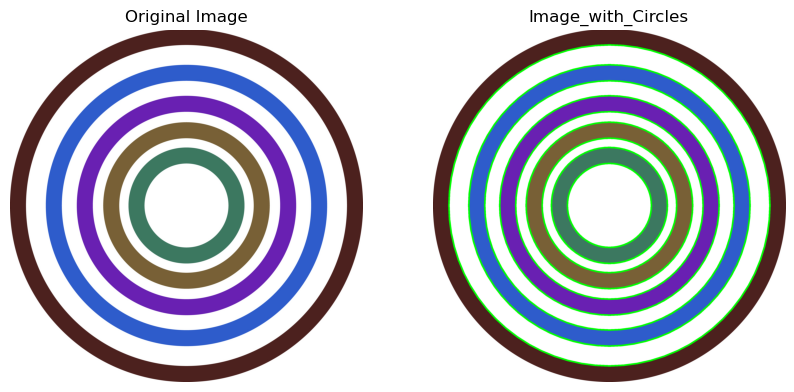

In [421]:
original_img = cv2.imread('media-ex11/b.jpg',-1); 
img = original_img.copy()
img_gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
img_gray = cv2.medianBlur(img_gray,3)
img_gray = cv2.GaussianBlur(img_gray,(3,3),0)

circles = cv2.HoughCircles(img_gray,cv2.HOUGH_GRADIENT_ALT,1, minDist = 0.00001, param1=120,param2=0.998,\
                           minRadius=250,maxRadius=1300)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
     cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),9)

show_mult_img_plt(1, 2, (original_img,img),titles=["Original Image","Image_with_Circles"])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 02</span> </span>  </span></p>
</div>

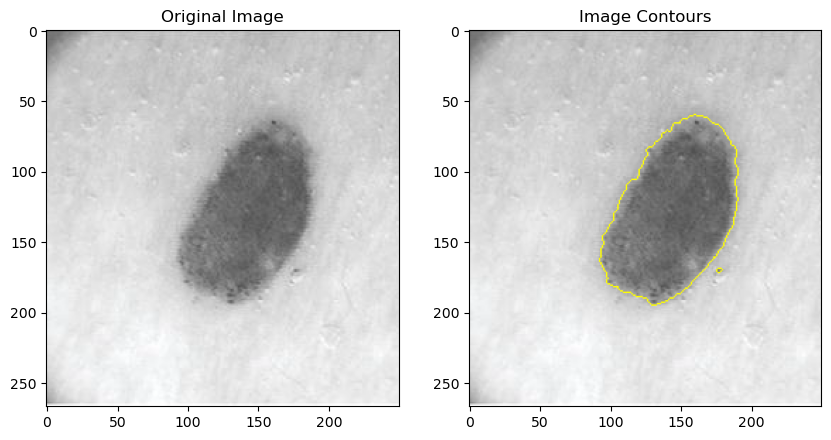

In [252]:
image2 = cv2.imread('media-ex11/F6.png',-1);  image2 = image2[:,0:250]

img2 = cv2.cvtColor(image2.copy(), cv2.COLOR_BGR2GRAY)
img2 = cv2.GaussianBlur(img2,(5,5),0)
ret, thresh = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours2, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE); contours2 = contours2[1:3]
img_and_contour2 = cv2.drawContours(image2.copy(), contours2, -1, (255,255,0), 1)

show_mult_img_plt(1, 2, (image2, img_and_contour2),titles=["Original Image",'Image Contours'])

<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 03</span> </span>  </span></p>
</div>

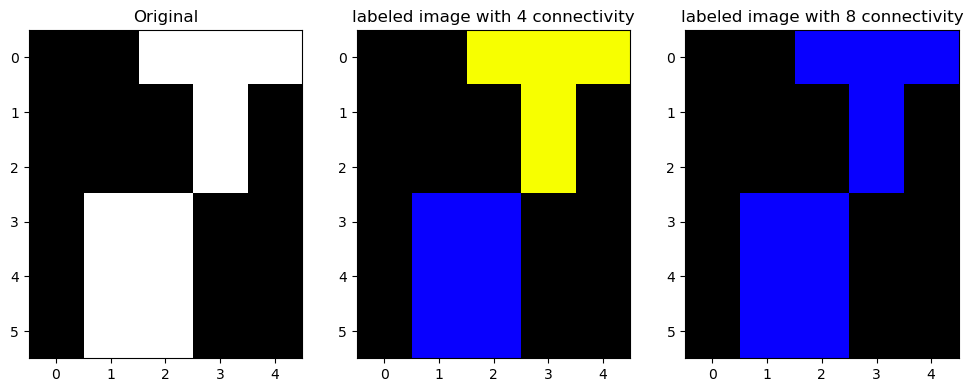

In [412]:
img3 = np.array([[0,0,255,255,255],[0,0,0,255,0],[0,0,0,255,0],[0,255,255,0,0],[0,255,255,0,0],[0,255,255,0,0]],np.uint8)

_, labels_with_4_connectivity = cv2.connectedComponents(img3, connectivity=4)
_, labels_with_8_connectivity = cv2.connectedComponents(img3, connectivity=8)

label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))
label_hue8 = np.uint8(179*labels_with_8_connectivity/np.max(labels_with_8_connectivity))

blank = np.ones_like(img3) * 255
labeled_img4 = cv2.merge([label_hue4, blank, blank])
labeled_img8 = cv2.merge([label_hue8, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv2.cvtColor(labeled_img4, cv2.COLOR_HSV2BGR)
labeled_img8 = cv2.cvtColor(labeled_img8, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0; labeled_img8[label_hue8==0] = 0

show_mult_img_plt(1,3,(img3,labeled_img4,labeled_img8),titles=["Original",'labeled image with 4 connectivity',\
                                                                "labeled image with 8 connectivity"],figuresize=[12,10],ax='on')


<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 04</span> </span>  </span></p>
</div>

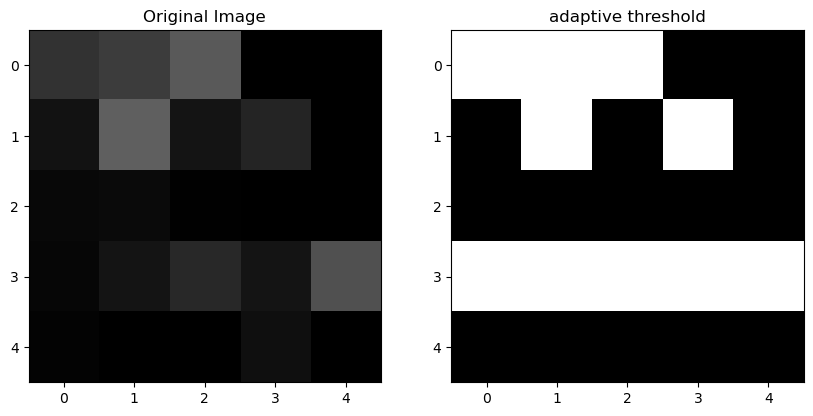

In [433]:
img4 = np.array([[50,60,90,0,0],[18,95,20,36,0],[8,10,1,0,0],[6,20,40,20,80],[3,0,0,15,0]],np.uint8)
output = cv2.adaptiveThreshold(img4,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,3,2)

show_mult_img_plt(1, 2, (img4,output),titles=["Original Image","adaptive threshold"], ax='on')

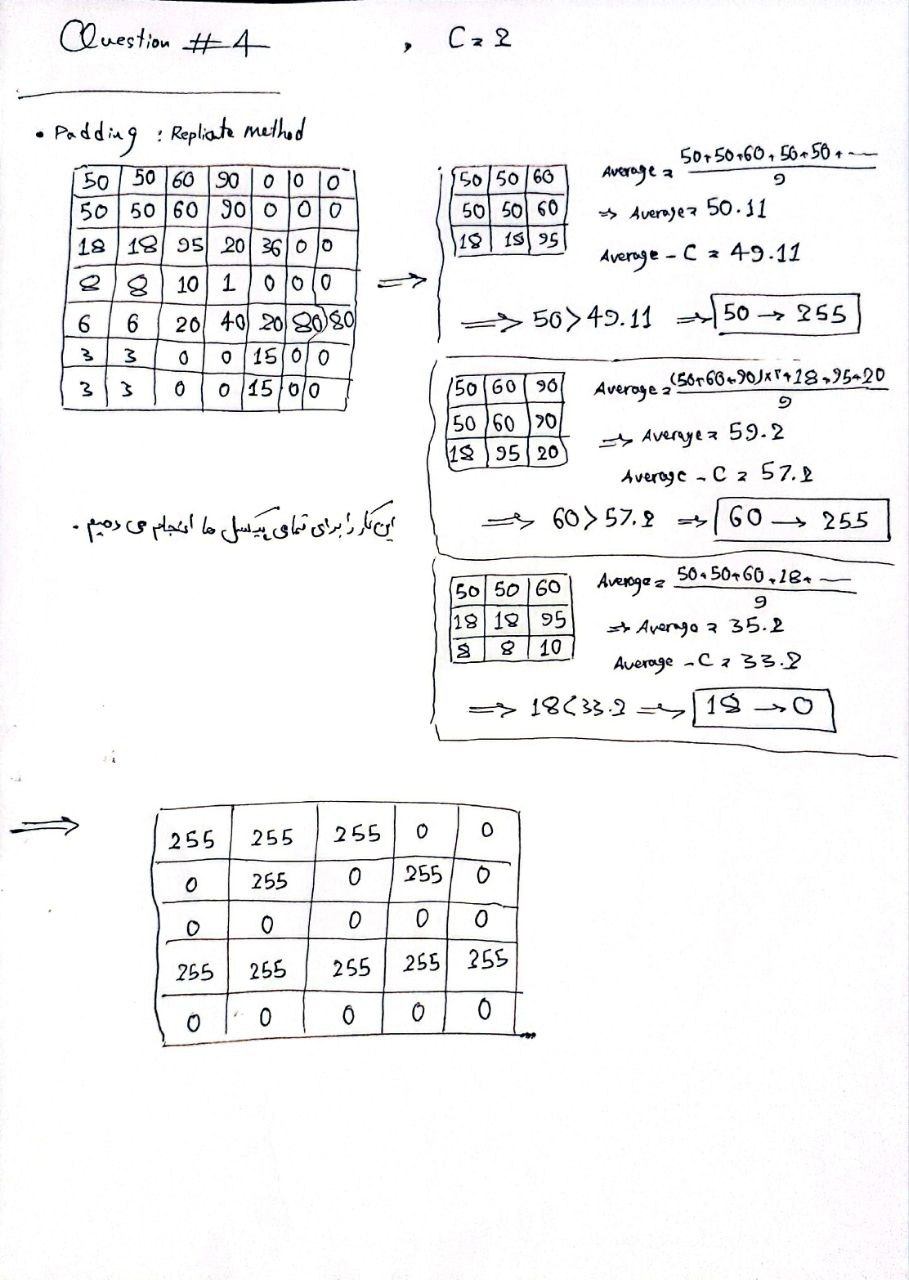